# Random Imputation  
[source](https://www.youtube.com/watch?v=Ratcir3p03w&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=38) <br><br> 

![ytss](assets/RandomImputation.png)  
<br><br>
Why does variance remain intact? because the data is being randomly chosen. so more occuring data has more chances of being selected as a random data then those which are not as much occuring (ghar). let's take an example to understand it better. data = [2,3,4,10,10,10,14,10,23,54,1,0,10,10,10,56] now which one of these has more chances of being picked? those which are closest to the mean because thats where the desity graph is at its highest. here mean is  14.18 and closest to 14 are 14,10,23.. so these numbers are already occuring more than others and if these are chosen again it wont change the PDF that much.

## Code

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('assets/Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop('Survived',axis=1)
y=df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,X_test.shape

((712, 2), (179, 2))

In [7]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [8]:
X_train.head()

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0


In [9]:
X_train.loc[X_train['Age_imputed'].isnull(),'Age_imputed'] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test.loc[X_test['Age_imputed'].isnull(),'Age_imputed'] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [10]:
X_train.loc[X_train['Age'].isnull(),['Age','Age_imputed']]

,Age,Age_imputed
29,NaN,31.0
55,NaN,20.0
533,NaN,21.0
495,NaN,35.0
468,NaN,27.0
...,...,...
330,NaN,28.0
214,NaN,13.0
466,NaN,29.0
121,NaN,21.0


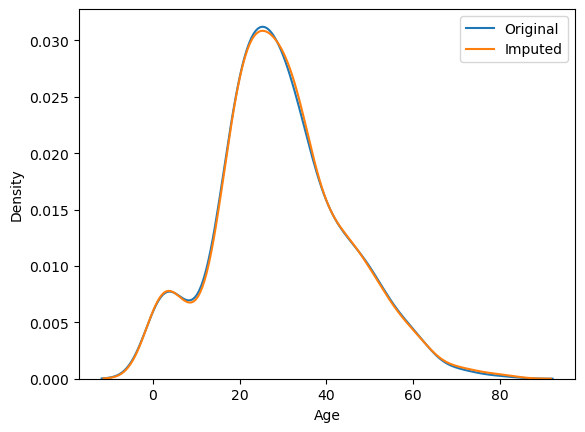

In [13]:
sns.kdeplot(X_train['Age'],label='Original')
sns.kdeplot(X_train['Age_imputed'],label='Imputed')

plt.legend()
plt.show()

In [14]:
X_train['Age'].var(),X_train['Age_imputed'].var()

(210.2517072477438, 214.55152064488192)

In [15]:
X_train[['Fare','Age','Age_imputed']].corr()

,Fare,Age,Age_imputed
Fare,1.000000,0.088103,0.066882
Age,0.088103,1.000000,1.000000
Age_imputed,0.066882,1.000000,1.000000


<Axes: >

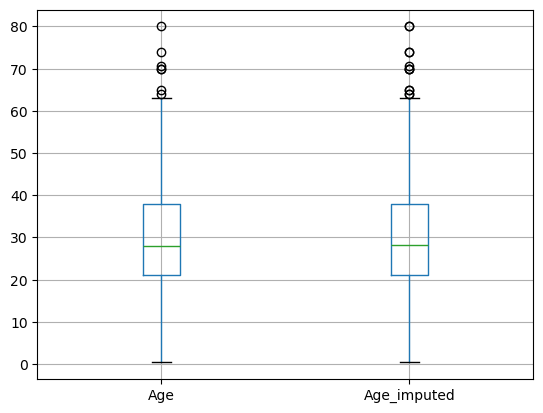

In [16]:
X_train[['Age','Age_imputed']].boxplot() # not that much of a difference in outliers

## Categorical Random Imputation

In [20]:
data = pd.read_csv('assets/train.csv',usecols=['FireplaceQu','GarageQual','SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [27]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [28]:
X = data
y=data['SalePrice']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [50]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']

X_test['GarageQual_imputed'] = X_test['GarageQual']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']


In [51]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQal_imputed,FireplaceQu_imputed,GarageQual_imputed
455,TA,TA,175500,TA,TA,TA
863,NaN,TA,132500,TA,NaN,TA
504,Fa,TA,147000,TA,Fa,TA
1413,Gd,TA,257000,TA,Gd,TA
1389,Gd,TA,131000,TA,Gd,TA


In [52]:
X_train['FireplaceQu'].isnull().sum()

np.int64(557)

In [53]:
X_train.loc[X_train['FireplaceQu_imputed'].isnull(),'FireplaceQu_imputed'] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu_imputed'].isnull().sum()).values
X_train.loc[X_train['GarageQual_imputed'].isnull(),'GarageQual_imputed'] = X_train['GarageQual'].dropna().sample(X_train['GarageQual_imputed'].isnull().sum()).values

X_test.loc[X_test['FireplaceQu_imputed'].isnull(),'FireplaceQu_imputed'] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu_imputed'].isnull().sum()).values
X_test.loc[X_test['GarageQual_imputed'].isnull(),'GarageQual_imputed'] = X_test['GarageQual'].dropna().sample(X_test['GarageQual_imputed'].isnull().sum()).values



In [55]:
X_train.loc[X_train['FireplaceQu'].isnull(),['FireplaceQu','FireplaceQu_imputed']]

,FireplaceQu,FireplaceQu_imputed
863,NaN,TA
1091,NaN,TA
590,NaN,TA
1446,NaN,Gd
453,NaN,Po
...,...,...
725,NaN,Gd
587,NaN,TA
607,NaN,Po
1287,NaN,Gd


In [61]:
temp  =pd.concat([
    X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts() / len(X_train)
],
                axis=1)

temp.columns = ['Original','Imputed']
temp

,Original,Imputed
TA,0.951043,0.950342
Fa,0.037171,0.036815
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [62]:
temp = pd.concat([
    X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
],
                axis=1)
temp.columns = ['Original','Imputed']
temp


,Original,Imputed
Gd,0.494272,0.494007
TA,0.412439,0.412671
Fa,0.040917,0.039384
Po,0.027823,0.029110
Ex,0.024550,0.024829


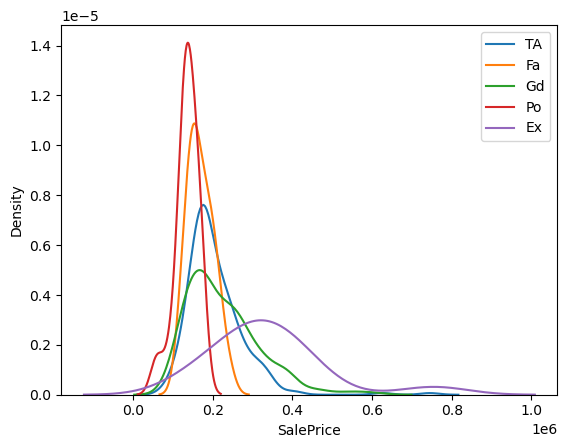

In [69]:
for category in X_train['FireplaceQu_imputed'].unique():
    sns.kdeplot(X_train[X_train['FireplaceQu']==category]['SalePrice'],label=category)
plt.legend()
plt.show()

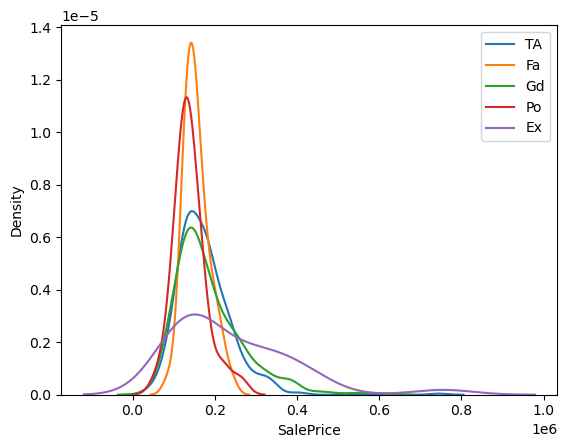

In [70]:
for category in X_train['FireplaceQu_imputed'].unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed']==category]['SalePrice'],label=category)
plt.legend()
plt.show()

<Axes: xlabel='FireplaceQu_imputed'>

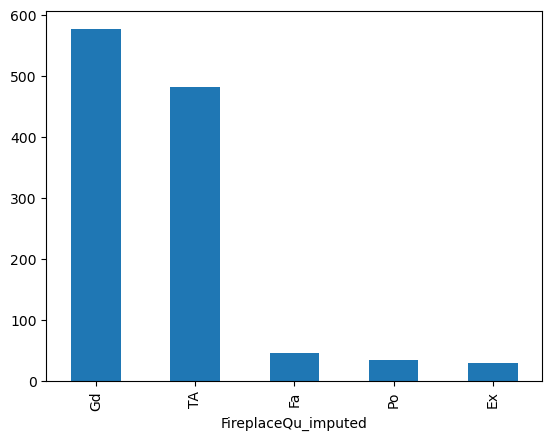

In [71]:
X_train['FireplaceQu_imputed'].value_counts().plot.bar()

<Axes: xlabel='FireplaceQu'>

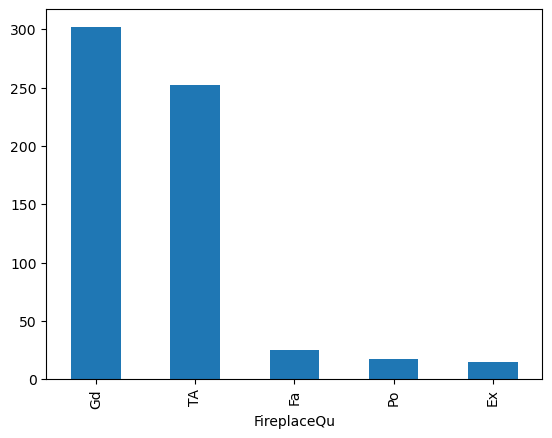

In [72]:
X_train['FireplaceQu'].value_counts().plot.bar()